# Regression Open-Ended Project

-----

# Previous Notebooks

- Web Scraping
- Cleaning data

In [1]:
import warnings
warnings.filterwarnings('ignore')

# EDA

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ebert_imdb_df = pickle.load(open('../data/interim/ebert_imdb_df.pkl', 'rb'))

In [4]:
ebert_imdb_df.head().T

,0,1,2,3,4
Title,Call Me by Your Name,Mudbound,Justice League,Wonder,Mr. Roosevelt
IMDB_Rating,8.4,7.4,7.4,8,6.8
Rating_Count,4766,2666,78007,1579,116
Description,Directed by Luca Guadagnino. With Armie Hamme...,"Directed by Dee Rees. With Carey Mulligan, Ga...","Directed by Zack Snyder. With Ben Affleck, Ga...",Directed by Stephen Chbosky. With Jacob Tremb...,"Directed by Noël Wells. With Noël Wells, Nick..."
Metascore,93,86,46,67,73
User_Review_Count,39,22,709,22,NaN
Critic_Review_Count,107,61,286,55,55
Genre_List,"Drama, Romance",Drama,"Action, Adventure, Fantasy",Drama,Comedy
Stars_List,"Armie Hammer,, Timothée Chalamet,, Michael Stu...","Carey Mulligan,, Garrett Hedlund,, Jason Clarke","Ben Affleck,, Gal Gadot,, Jason Momoa","Jacob Tremblay,, Owen Wilson,, Izabela Vidovic","Noël Wells,, Nick Thune,, Britt Lower"
Director,Luca Guadagnino,Dee Rees,Zack Snyder,Stephen Chbosky,Noël Wells


In [5]:
ebert_imdb_df.columns.tolist()

['Title',
 'IMDB_Rating',
 'Rating_Count',
 'Description',
 'Metascore',
 'User_Review_Count',
 'Critic_Review_Count',
 'Genre_List',
 'Stars_List',
 'Director',
 'Country',
 'Release_Date',
 'EbertStars',
 'Year',
 'URL',
 'Rating',
 'Runtime',
 'Review']

## Histogram of Ebert Ratings

In [6]:
ebert_imdb_df.EbertStars.value_counts().sort_index()

0.0      90
0.5     132
1.0     518
1.5     699
2.0    1545
2.5    1160
3.0    2905
3.5    1618
4.0     837
Name: EbertStars, dtype: int64

The star ratings are in increments of 0.5, from 0.0 to 4.0, so these values are discrete, and thus could be plotted on a bar chart. But lets use a histogram with 9 bins so we can also see a distribution as a density estimate.

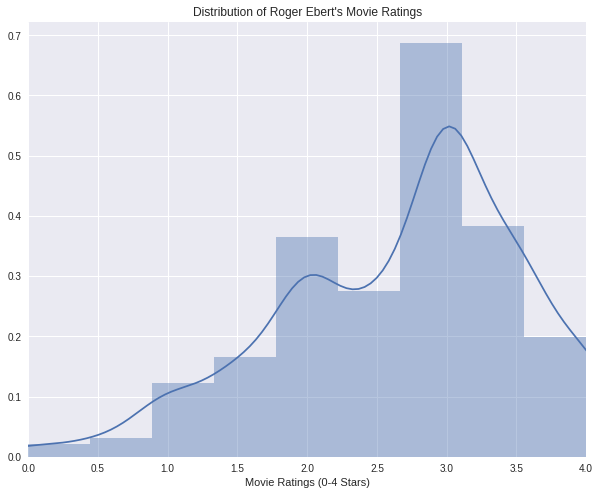

In [7]:
plt.figure(figsize=(10,8))
ax = sns.distplot(ebert_imdb_df['EbertStars'].dropna(), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Movie Ratings (0-4 Stars)')
ax.set(xlim=(0, 4))
ax.set_title("Distribution of Roger Ebert's Movie Ratings");

## Pairplot of Numerical Features

In [8]:
# get a subset of features from the data that contains all numeric features
# plus the movie title
movie_ratings = ebert_imdb_df[['Title', 'EbertStars', 'IMDB_Rating', 'Rating_Count', 
                            'Metascore', 'User_Review_Count', 'Critic_Review_Count', 'Year']]

movie_ratings = movie_ratings.dropna()

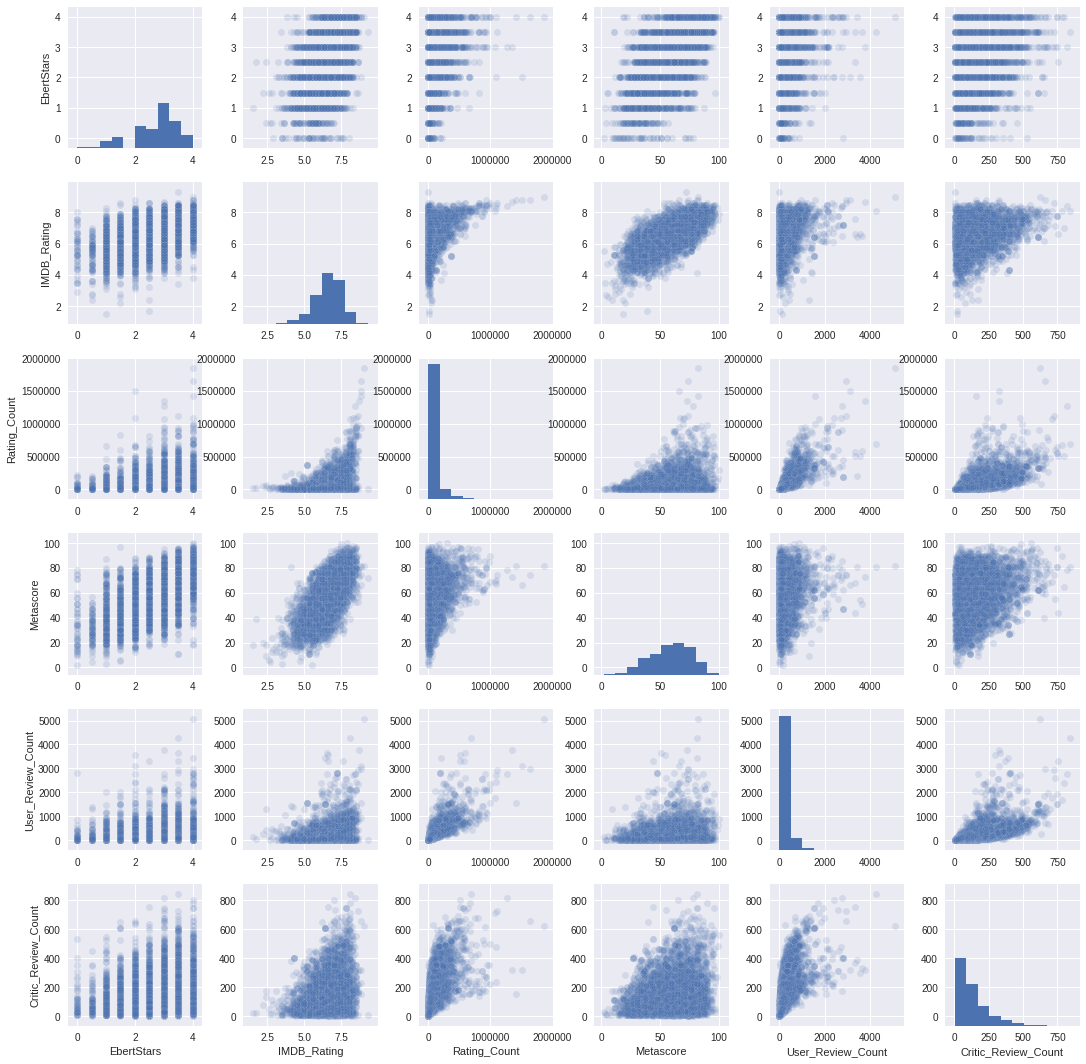

In [9]:
# create the pairplot after excluding 'Year'
# non-numeric (the title) will be excluded automatically
# use lower alpha to aid with density visualization
sns.pairplot(movie_ratings.drop('Year', axis=1), plot_kws={'alpha': 0.15});

## Univariate Visualizations by Rating

Below we can take a closer look at the diagonal plots above (the univariate plots).

In [10]:
individual_rating = movie_ratings[movie_ratings['EbertStars'] == 3.0]

In [11]:
individual_rating.Critic_Review_Count.skew()

1.8063604997077374

In [12]:
def univariate_visuals(rating=3.0):
    """ Creates individual univariate distribution plots
        for Rating Count, IMDb Rating, Metascore, User Review Count,
        and Critic Review Count. For distributions with long tails,
        also plot the log transform.
        
        rating : visualize only movie data with an EbertStars value
            equal to this argument.
    """
    # features of interest
    cols = ['Rating_Count', 'IMDB_Rating', 'Metascore', 
            'User_Review_Count', 'Critic_Review_Count']
    # filter the data for only rating of interest
    individual_rating = movie_ratings[movie_ratings['EbertStars'] == rating]
    
    # loop over columns and create plots
    for col in cols:
        values = individual_rating[col]
        # plot unscaled values
        ax = sns.distplot(values, bins=9, kde_kws={"bw": 0.25},
                          axlabel=col.replace('_', ' ') + 'for {}'.format(rating))
        ax.set_title("Original Scale Distribution of {}".format(col))
        plt.show()
        # check skew (plot log transform if skew > 1)
        if values.skew() > 1:
            ax = sns.distplot(np.log(values), bins=9, kde_kws={"bw": 0.25},
                              axlabel=col.replace('_', ' ') + 'for {}'.format(rating))
            ax.set_title("Log Transform of {}".format(col))
            plt.show()

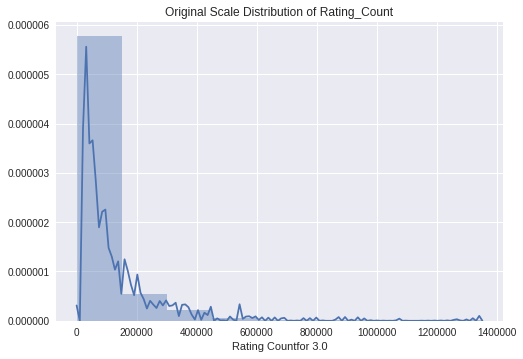

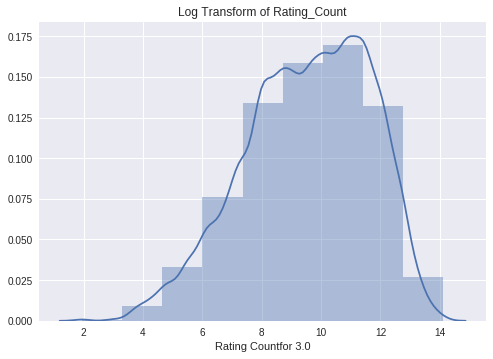

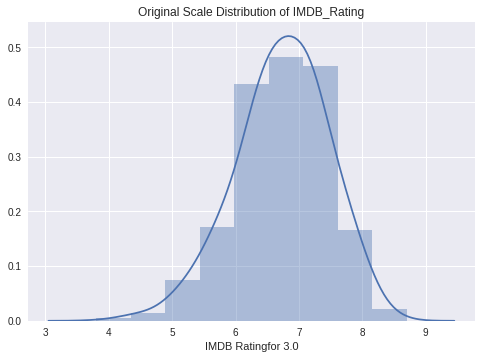

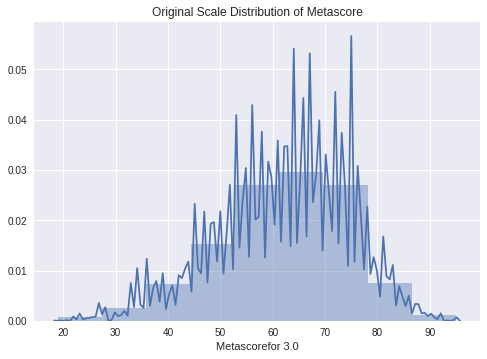

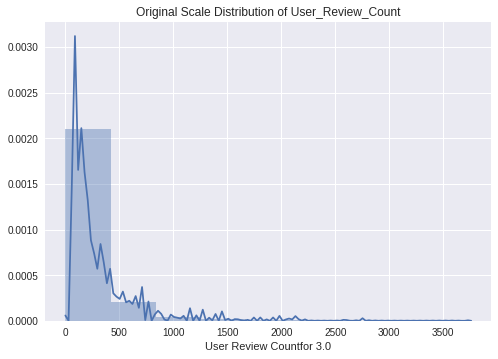

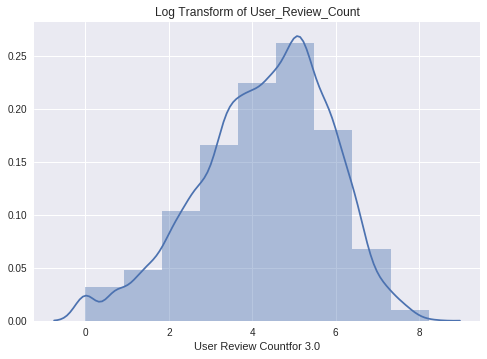

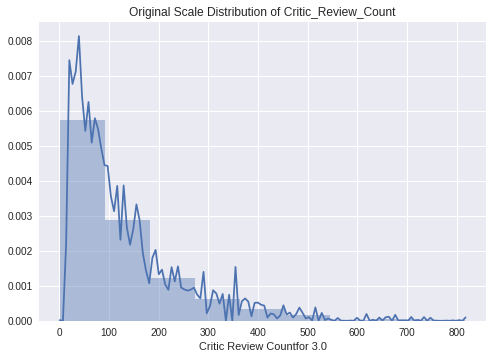

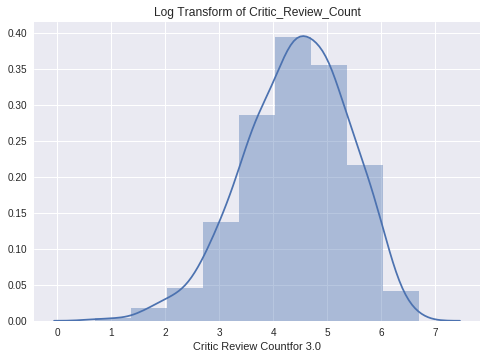

In [13]:
univariate_visuals()

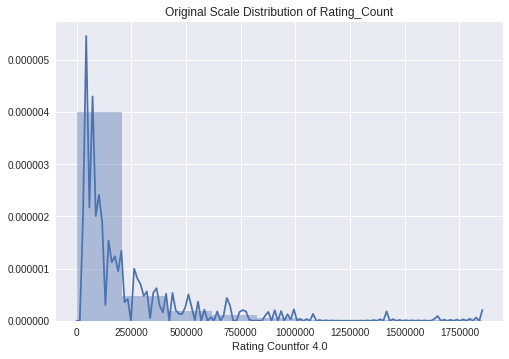

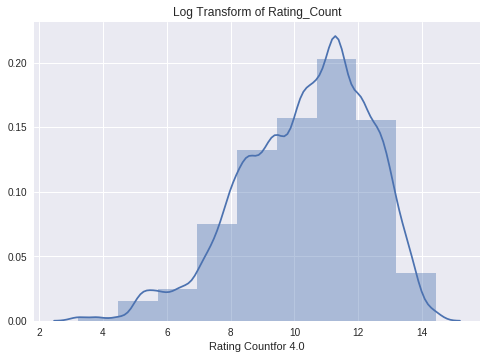

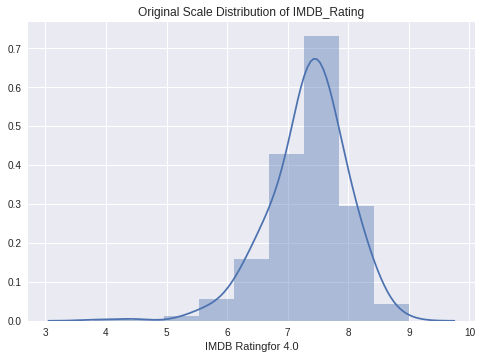

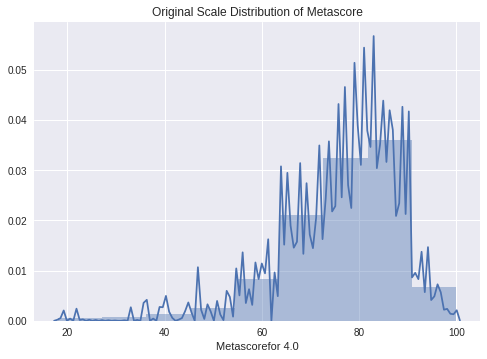

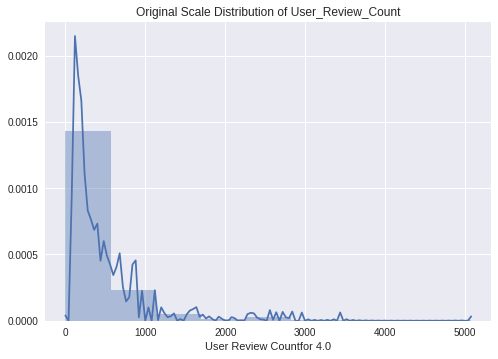

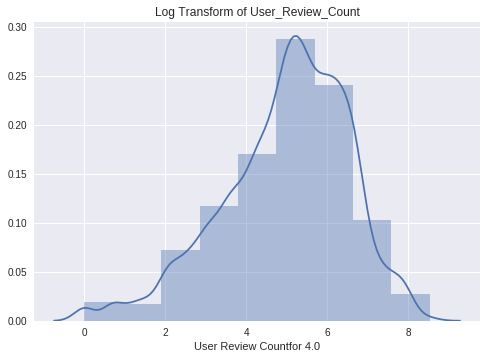

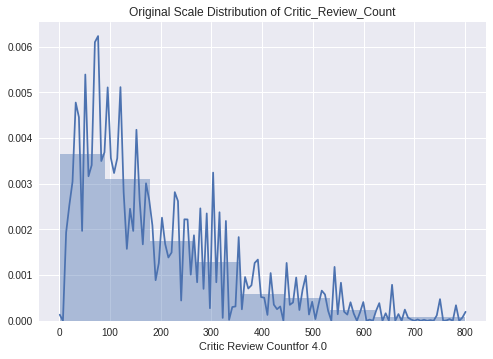

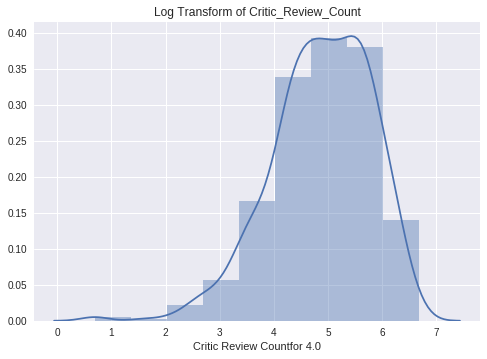

In [14]:
univariate_visuals(rating=4.0)

## Bivariate Visualizations by Rating

A better look at some bivariate data using jointplots, to see regression lines with histograms and density estimates on each axis. The second plot illustrates the use of hex plots &mdash; these are an extremely useful alternative to scatter plots when there are many points, and we would like a better understanding of the bivariate distribution.

In [15]:
def bivariate_visuals(rating=3.0):
    individual_rating = movie_ratings[movie_ratings['EbertStars'] == rating]
    individual_rating['log_user'] = np.log(individual_rating['User_Review_Count'])
    individual_rating['log_critic'] = np.log(individual_rating['Critic_Review_Count'])
    
    # IMDB Rating vs. Metascore
    ax = sns.jointplot('IMDB_Rating', 'Metascore', data=individual_rating, kind='reg', size=9)
    sns.plt.title("IMDB Rating vs. Metascore for Ebert Starts {}".format(rating))
    
    # User Review Count vs. Critic Review Count
    ax = sns.jointplot('log_user', 'log_critic', data=individual_rating, kind='hex', size=9)
    sns.plt.title("User Review Count vs. Critic Review Count (Log Scale) for Ebert Stars {}".format(rating))

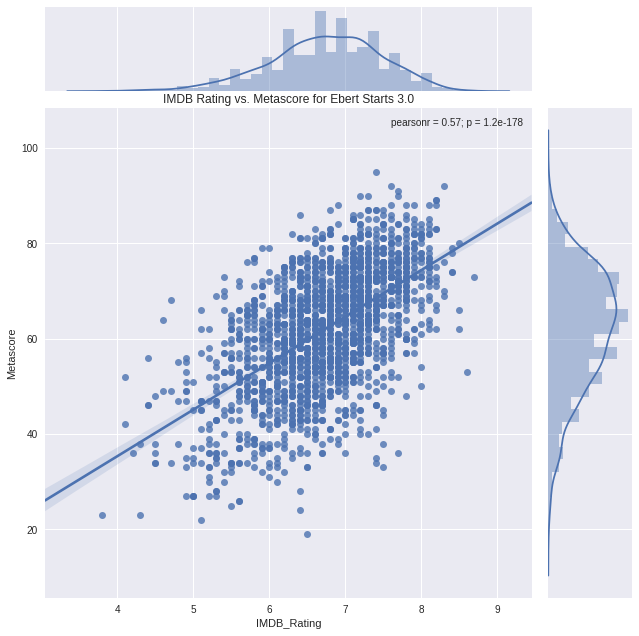

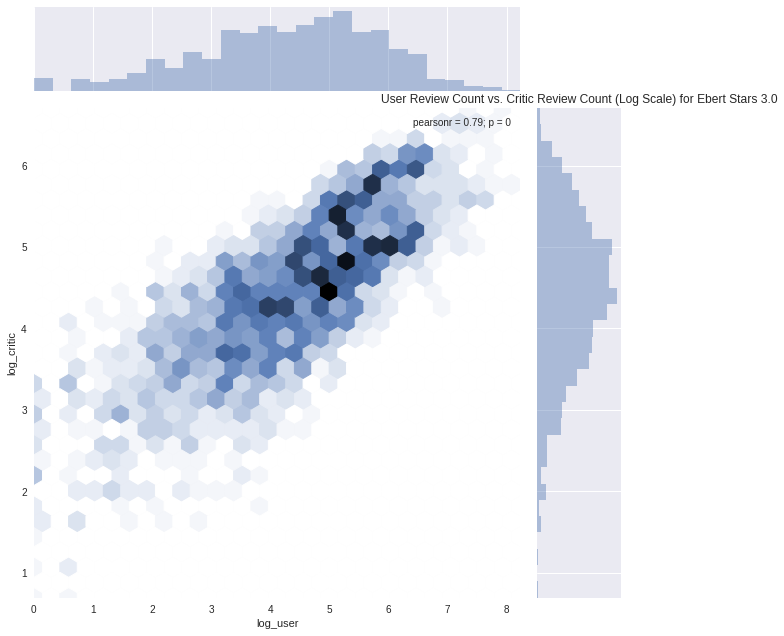

In [16]:
bivariate_visuals()

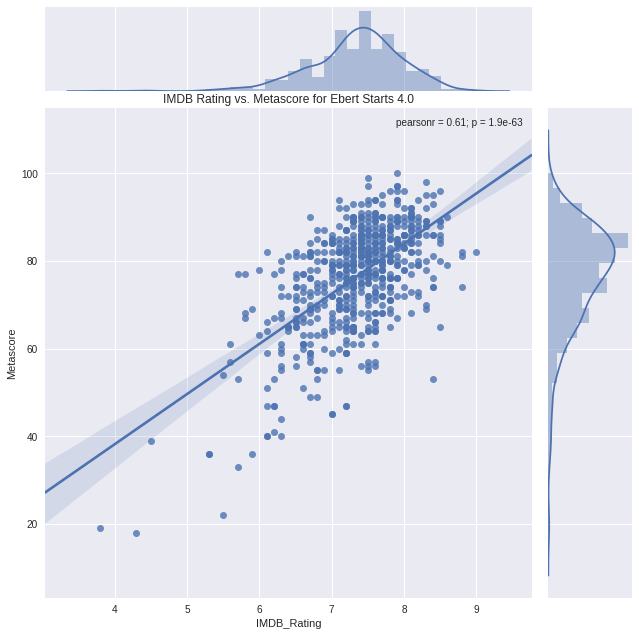

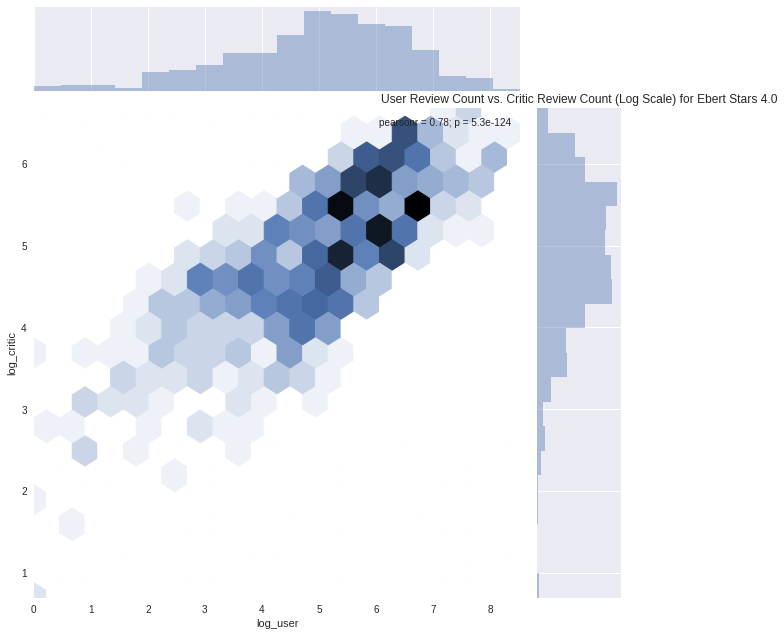

In [17]:
bivariate_visuals(rating=4.0)

## Ratings Vs. Categorical Features

In [18]:
# a quick look at non-numeric data (look at object types)
ebert_imdb_df.describe(include=['O'])

,Title,Description,Genre_List,Stars_List,Director,Country,URL,Rating,Review
count,9504,9504,9504,9504,9504,9504,9504,9504,9504
unique,9051,8845,536,8551,4523,205,9200,20,9189
top,The Circle,,Drama,,Woody Allen,USA,/reviews/the-circle-2001,R,Advertisement
freq,9,10,846,258,32,7071,3,3727,12


### EbertStars by Director

There are over 4500 directors, so it isn't ideal to look at all of them individually, but we have at least a couple approaches to explore any relationships:

1. Plot director averages against director frequency
2. Pick out some directors with the highest average EbertStars, the lowest average, and some from around the median.

#### Director average EbertStars vs. Director Frequency

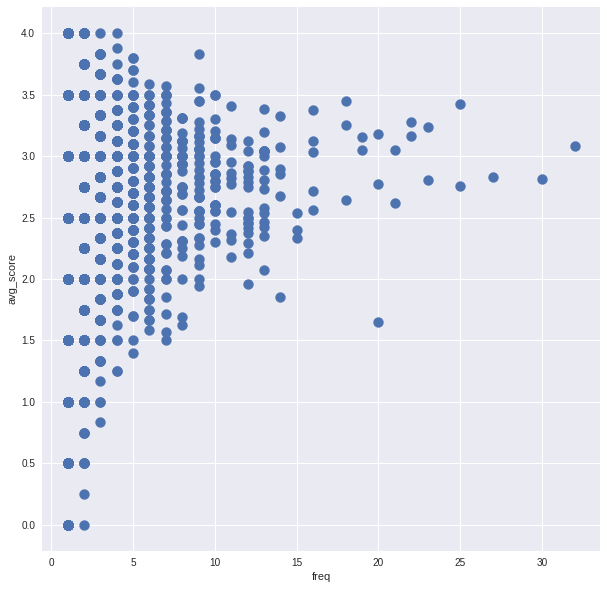

In [19]:
directors = ebert_imdb_df.groupby('Director').EbertStars\
    .apply(lambda x: pd.Series({'freq': x.count(),'avg_score': x.mean()}))\
    .unstack()
directors.plot.scatter('freq', 'avg_score', s=100, figsize=(10,10));


Interestingly (but perhaps not surprisingly) the EbertStars variance drastically decreases with increasing director frequency. It seems reasonable the the more movies a director has put out, the more likely they are to be successful enough to get an average score above 2 stars.

#### Sample directors from various percentiles

In [20]:
# first filter out directors who have fewer than 5 movies
director_avgs = directors[directors.freq >= 5]

# get percentiles of averages
director_percentiles = director_avgs.quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])
director_percentiles

,avg_score,freq
0.05,1.915833,5.0
0.10,2.161111,5.0
0.25,2.428571,5.0
0.50,2.750000,7.0
0.75,3.055556,9.0
0.90,3.312500,13.0
0.95,3.444444,16.0


Let's sample from within the 5th, around the 50th, and above the 95th percentiles.

In [21]:
director_sample = director_avgs[director_avgs.avg_score.between(0.0, 1.916) |
                                director_avgs.avg_score.between(2.7, 2.8) |
                                director_avgs.avg_score.between(3.444, 4.0)]

director_sample.size

194

This number is manageable. Let's create boxplots from the original data using these names.

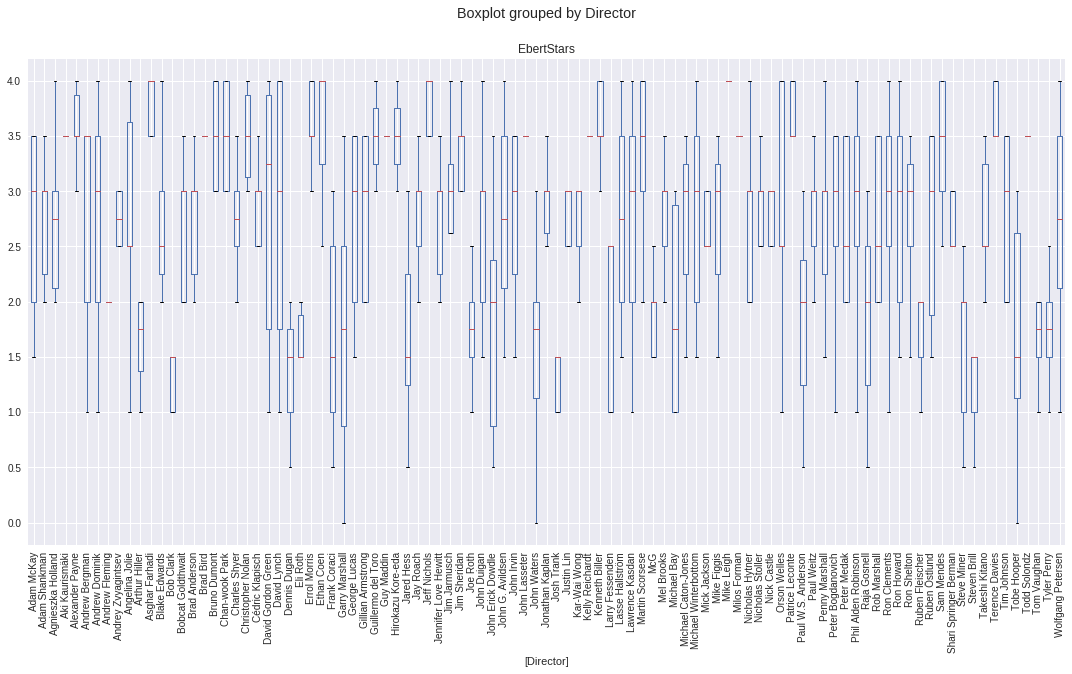

In [22]:
ebert_imdb_df[ebert_imdb_df.Director.isin(director_sample.index)]\
    .boxplot(column=['EbertStars'], by=['Director'], figsize=(18,9), rot=90);

In the plot above we can see distributions for directors from lower, middle, and upper percentiles. Some of these directors have relatively narrow distributions, while others are quite wide. The IQR on many of them is narrow enough that Direct could be useful as a predictor, although not all by itself.

## Plan for Following Notebooks

- Feature Engineering
- Making predictions
- Final analysis